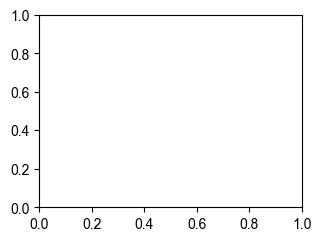

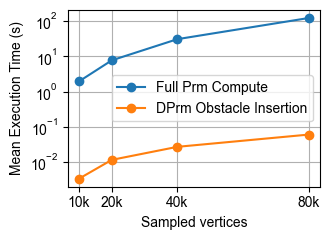

In [6]:
import os
import glob
import json
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 10, "font.family": "Arial"})

fig = plt.figure(figsize=(3.39, 2.5))
ax = fig.add_subplot(111)

# Adjust these variables as needed:
base_dir = "target/criterion"
experiment = "DPrm vs. Prm, 8 threads"  # Replace with your experiment folder name.
variants = [
    "Full Prm Compute",
    "DPrm Obstacle Insertion",
]  # Replace with the names of your variants.

ns = ["10000", "20000", "40000"]
# Dictionary to hold data for each variant.
# We'll map each variant to a dictionary of { n_value: median_point_estimate }.
data = {variant: {} for variant in variants}

for variant in variants:
    # Build a glob pattern that matches all n values for this variant.
    # The pattern corresponds to: base_dir/experiment/variant/*/new/estimates.json
    pattern = os.path.join(base_dir, experiment, variant, "*", "new", "estimates.json")
    for estimates_file in glob.glob(pattern):
        # Extract the [n] directory name.
        # The file path is: .../<experiment>/<variant>/<n>/new/estimates.json
        # We go up two directories from estimates_file: first up to "new", then to "<n>"
        n_str = os.path.basename(os.path.dirname(os.path.dirname(estimates_file)))
        try:
            # Convert n to a numeric value (e.g., int or float)
            n_value = float(n_str)
        except ValueError:
            # If the directory name is not a number, skip this file.
            print(f"Skipping non-numeric directory: {n_str}")
            continue
        if n_value < 10000:
            continue
        # Load the estimates.json file.
        with open(estimates_file, "r") as f:
            estimates = json.load(f)

        # Extract the mean point estimate.
        # (You can also extract other statistics, e.g., the confidence interval,
        #  if you’d like to include error bars.)
        mean_point = estimates["mean"]["point_estimate"]

        # Save the data point.
        data[variant][n_value] = mean_point

fig, ax = plt.subplots(figsize=(3.4, 2.5))

for variant, values in data.items():
    # Sort the data by n (x-axis).
    ns = sorted(values.keys())
    means = [values[n] for n in ns]
    means_ms = [value / 1e9 for value in means]
    ax.plot(ns, means_ms, marker="o", label=variant)

ax.set_xlabel("Sampled vertices")
ax.set_ylabel("Mean Execution Time (s)")
ax.set_title("")
#ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_yticks([0.01, 0.1, 1, 10, 100])
#ax.set_yticklabels(["0.01", "0.1", "1", "10", "100"])
ax.set_xticks([10000, 20000, 40000, 80000])
ax.set_xticklabels(["10k", "20k", "40k", "80k"])
ax.minorticks_off()

ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig("dprm_vs_prm_v2.pdf")